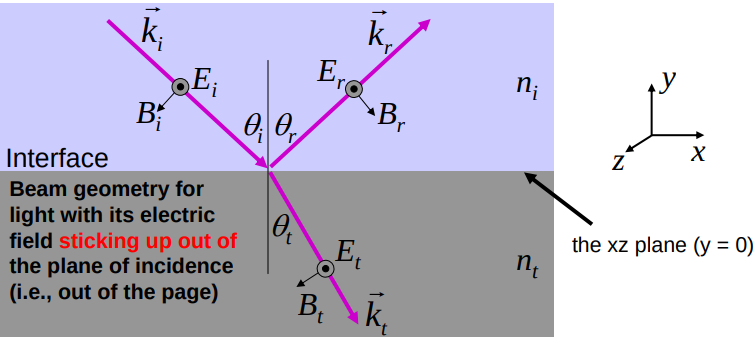
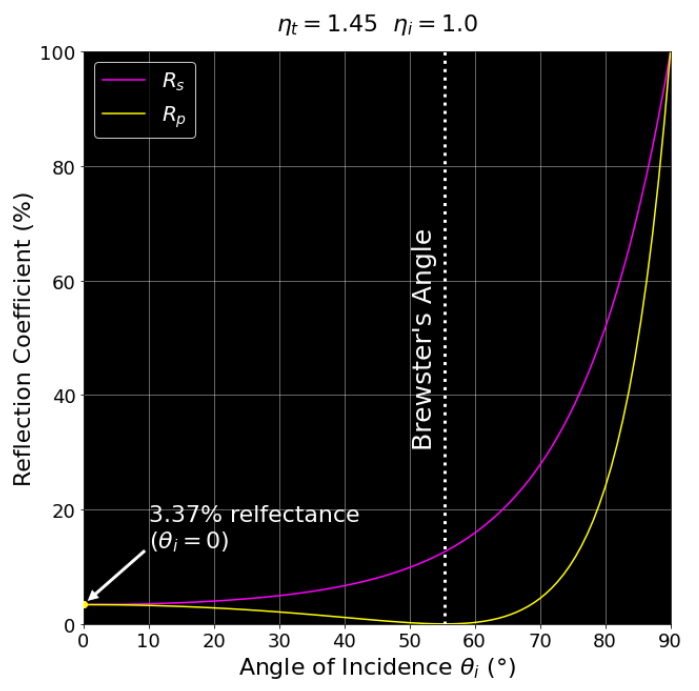

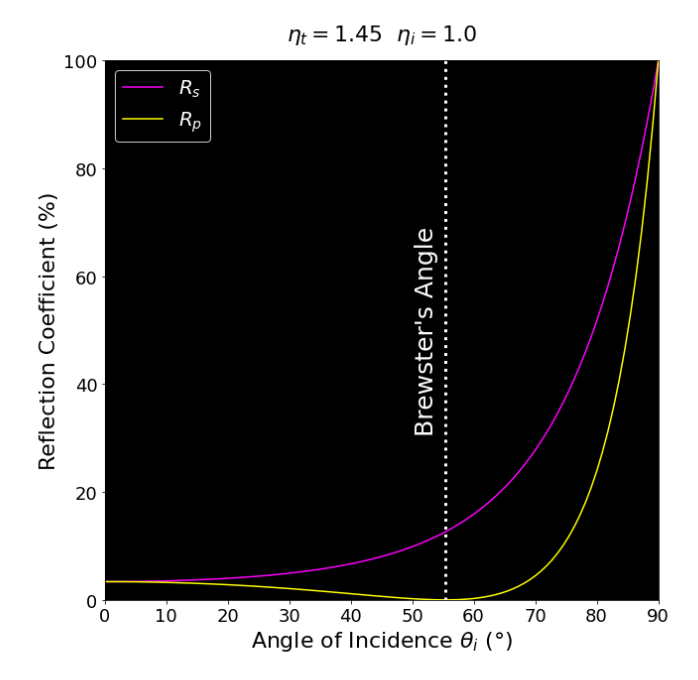
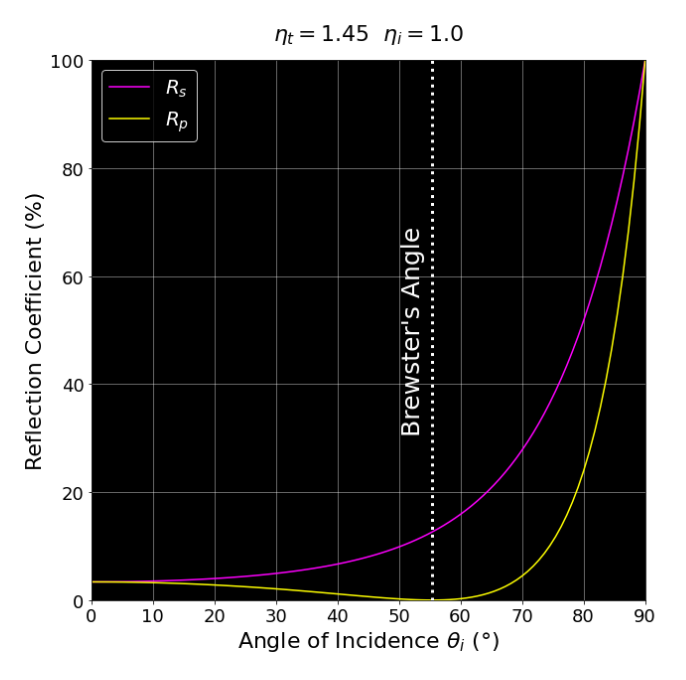
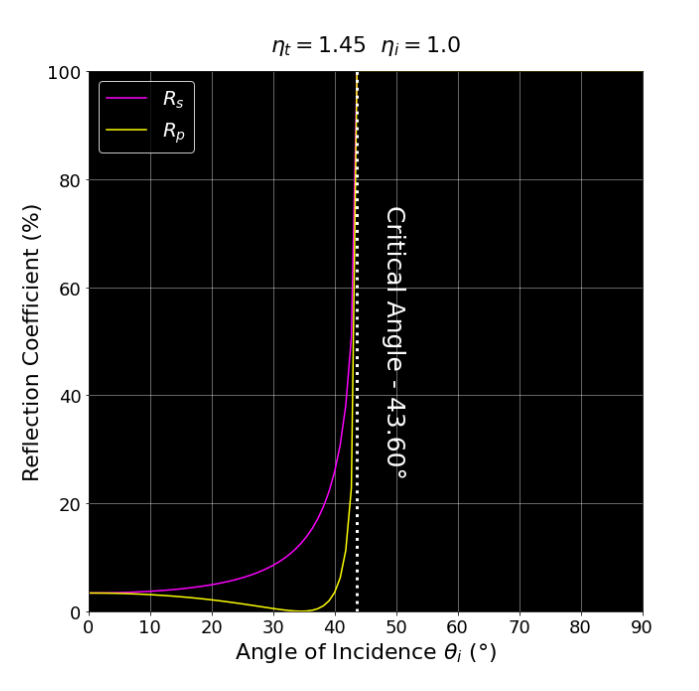
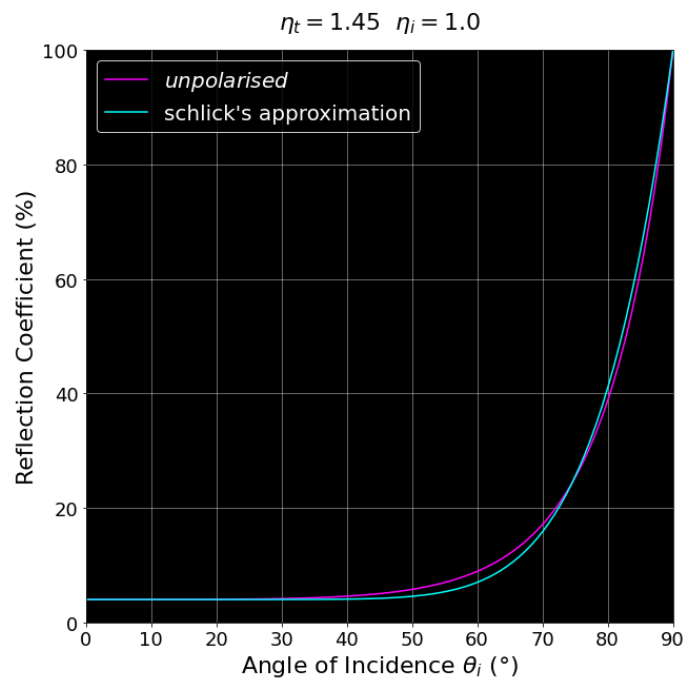

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import math

def to_radians(degrees):
	return degrees * (np.pi / 180)

def to_degrees(radians):
	return radians * (180 / np.pi)

def fresnel_reflectance(n_t, n_i, theta_i):
        # Calculate the reflection coefficient using the Fresnel equations
        # You can implement the equations here

        theta_i = to_radians(theta_i)

        theta_t = np.arcsin((n_i * np.sin(theta_i)) / n_t)

        r_s = (n_t * np.cos(theta_i) - n_i * np.cos(theta_t)) / (n_t * np.cos(theta_i) + n_i * np.cos(theta_t))
        
        r_p = (n_t * np.cos(theta_t) - n_i * np.cos(theta_i)) / (n_t * np.cos(theta_t) + n_i * np.cos(theta_i))
        
        if isinstance(r_s, np.ndarray) and isinstance(r_p, np.ndarray):
            r_s[np.isnan(r_s)] = 1.
            r_p[np.isnan(r_p)] = 1.

        return (r_s * r_s, r_p * r_p)


def schlick_approximation(n_t, n_i, theta_i):
    srR_0 = (n_i - n_t) / (n_i + n_t)
    r_0 = srR_0 * srR_0
    theta_i = to_radians(theta_i)
    r0 = r_0 + (1-r_0) * np.power(1 - np.cos(theta_i), 5)
    return r0

def plot_critical_angle(n_i, n_t, fresnel_reflectance=fresnel_reflectance):
    theta = np.linspace(0, 90, 100)
    r_par, r_ort = fresnel_reflectance(n_t, n_i, theta)

    plt.figure(figsize=(10, 10))

    plt.plot(theta, r_ort * 100, color='magenta', label=r'$R_s$')
    plt.plot(theta, r_par * 100, color='yellow', label=r'$R_p$')

    plt.legend(loc='upper left', fontsize=20, facecolor='black', edgecolor='white', labelcolor='white')

    plt.xlabel(r'Angle of Incidence $\theta_i$ ' + '($\u00b0$)', fontsize=22)
    plt.ylabel('Reflection Coefficient (%)', fontsize=22)

    plt.title(f'$\eta_i = {n_i}$   $\eta_t = {n_t}$', fontsize=22, pad=20)
    plt.grid(True, color='white', alpha=.5)
    plt.gca().set_facecolor('black')

    plt.tick_params(axis='both', which='major', labelsize=18)

    theta_c = np.arcsin(n_t / n_i) * 180 / np.pi

    plt.axvline(x=theta_c, color='white', linestyle='dotted', linewidth=3)

    plt.annotate('', xy=(90, 10), xytext=(theta_c, 10), arrowprops=dict(arrowstyle='<->', color='white'))
    plt.text((90 + theta_c) / 2, 12, 'Range of Total Internal Reflection', color='white', ha='center', fontsize=15)

    plt.text(theta_c + 2, 50, f'Critical Angle = {theta_c:.2f}\u00b0', rotation=-90, verticalalignment='center', color='white', fontsize=25)

    plt.xlim(0, 90)
    plt.ylim(0, 100)
    plt.xticks(np.arange(0, 91, 10))

    plt.show()

def plot_brewster_angle(n_i, n_t, fresnel_reflectance=fresnel_reflectance):
    # Define the incident angles ranging from 0 to 90 degrees
    theta = np.linspace(0, 90, 100)

    # Calculate the reflection coefficient for each incident angle
    r_par, r_ort = fresnel_reflectance(n_t, n_i, theta)

    r_par_0, r_ort_0 = fresnel_reflectance(n_t, n_i, 0)

    plt.figure(figsize=(10, 10))

    # Add a mark for where the curves are at 0 incidence
    plt.scatter(0, r_ort_0 * 100, color='magenta', zorder=5)
    plt.scatter(0, r_par_0 * 100, color='yellow', zorder=5)

    # Add text to indicate the reflectance coefficient at 0 incidence
    plt.text(10, r_ort_0 * 100 + 10, f'{r_ort_0 * 100:.2f}% relfectance \n' r'($\theta_i = 0 $)', color='white', ha='left', fontsize=22)
    plt.annotate('', xy=(0, r_ort_0 * 100), xytext=(10, r_ort_0 * 100 + 10),
                 arrowprops=dict(facecolor='white', shrink=0.05))

    # Plot the Fresnel reflectance
    plt.plot(theta, r_ort * 100, color='magenta', label=r'$R_s$')
    plt.plot(theta, r_par * 100, color='yellow', label=r'$R_p$')

    plt.legend(loc='upper left', fontsize=20, facecolor='black', edgecolor='white', labelcolor='white')

    plt.xlabel(r'Angle of Incidence $\theta_i$ ' + '($\u00b0$)', fontsize=22)
    plt.ylabel('Reflection Coefficient (%)', fontsize=22)

    plt.title(f'$\eta_i = {n_i}$   $\eta_t = {n_t}$', fontsize=22, pad=20)
    plt.grid(True, color='white', alpha=.5)
    plt.gca().set_facecolor('black')

    plt.tick_params(axis='both', which='major', labelsize=18)
    theta_b = to_degrees(math.atan(n_t/n_i))
    plt.axvline(x=theta_b, color='white', linestyle='dotted', linewidth=3)

    # Add a horizontal label to Brewster's angle
    plt.text(theta_b - 6, 50, f'Brewster\'s Angle = {theta_b:.2f}\u00b0', rotation=90, verticalalignment='center', color='white', fontsize=25)

    # Set the y-axis limits and ticks
    plt.xlim(0, 90)
    plt.ylim(0, 100)
    plt.xticks(np.arange(0, 91, 10))

    plt.show()



def plot_schlick_approximation(n_i=1.00, n_t=1.45):
    # Define the incident angles ranging from 0 to 90 degrees
    theta = np.linspace(0, 90, 100)
    r_par, r_ort = fresnel_reflectance(n_t, n_i, theta)

    # Calculate the reflection coefficient for each incident angle using Schlick's approximation
    r_par_sh = schlick_approximation(n_t, n_i, theta)
    r_par_sh0 = schlick_approximation(n_t, n_i, 0)


    plt.figure(figsize=(10, 10))
    plt.plot(theta, ((r_ort + r_par) / 2) * 100, color='magenta', label=r'$unpolarised$')

    # Add a mark for where the curves are at 0 incidence
    plt.scatter(0, r_par_sh0 * 100, color='cyan', zorder=5)

    # Plot the Fresnel reflectance
    plt.plot(theta, r_par_sh * 100, color='cyan', label='schlick\'s approximation' )

    plt.legend(loc='upper left', fontsize=20, facecolor='black', edgecolor='white', labelcolor='white')

    plt.xlabel(r'Angle of Incidence $\theta_i$ ' + '($\u00b0$)', fontsize=22)
    plt.ylabel('Reflection Coefficient (%)', fontsize=22)

    plt.title(f'$\eta_i = {n_i}$   $\eta_t = {n_t}$', fontsize=22, pad=20)
    plt.grid(True, color='white', alpha=.5)
    plt.gca().set_facecolor('black')

    plt.tick_params(axis='both', which='major', labelsize=18)

    # Set the y-axis limits and ticks
    plt.xlim(0, 90)
    plt.ylim(0, 100)
    plt.xticks(np.arange(0, 91, 10))

    plt.show()

/tmp/ipykernel_1761/4018569890.py:17: RuntimeWarning: invalid value encountered in arcsin
  theta_t = np.arcsin((n_i * np.sin(theta_i)) / n_t)


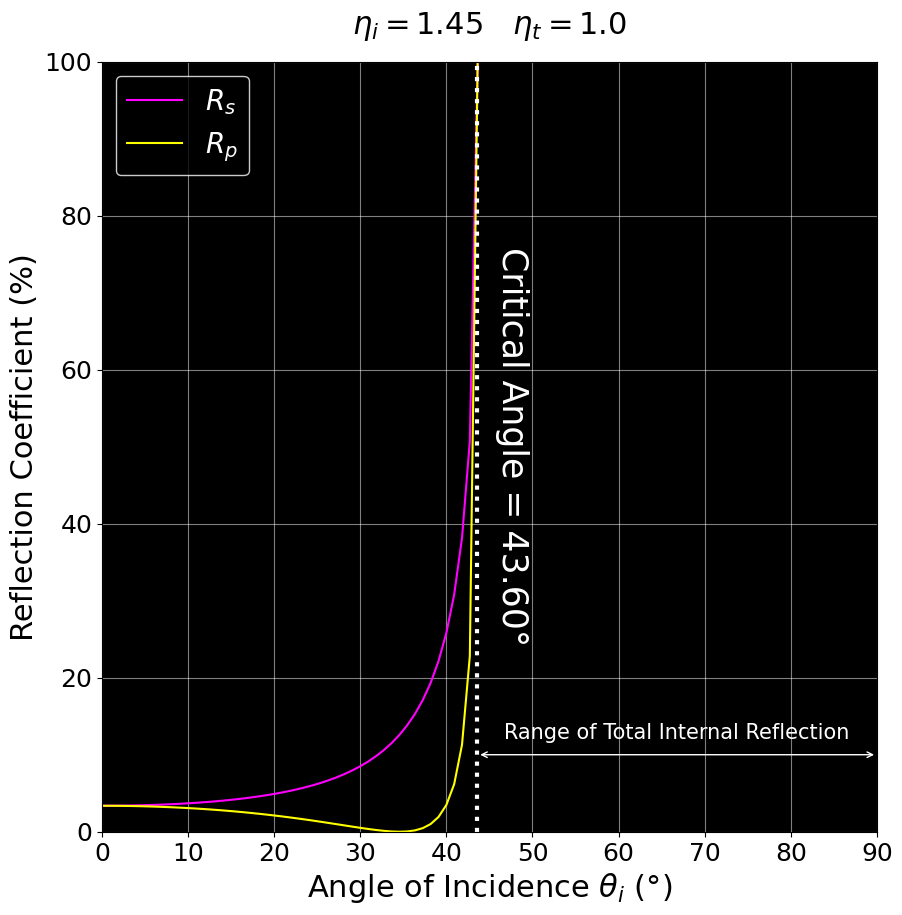

In [82]:


# Define the refractive index of the dielectric material
n_i = 1.45
n_t = 1.00

plot_critical_angle(n_i, n_t, fresnel_reflectance)


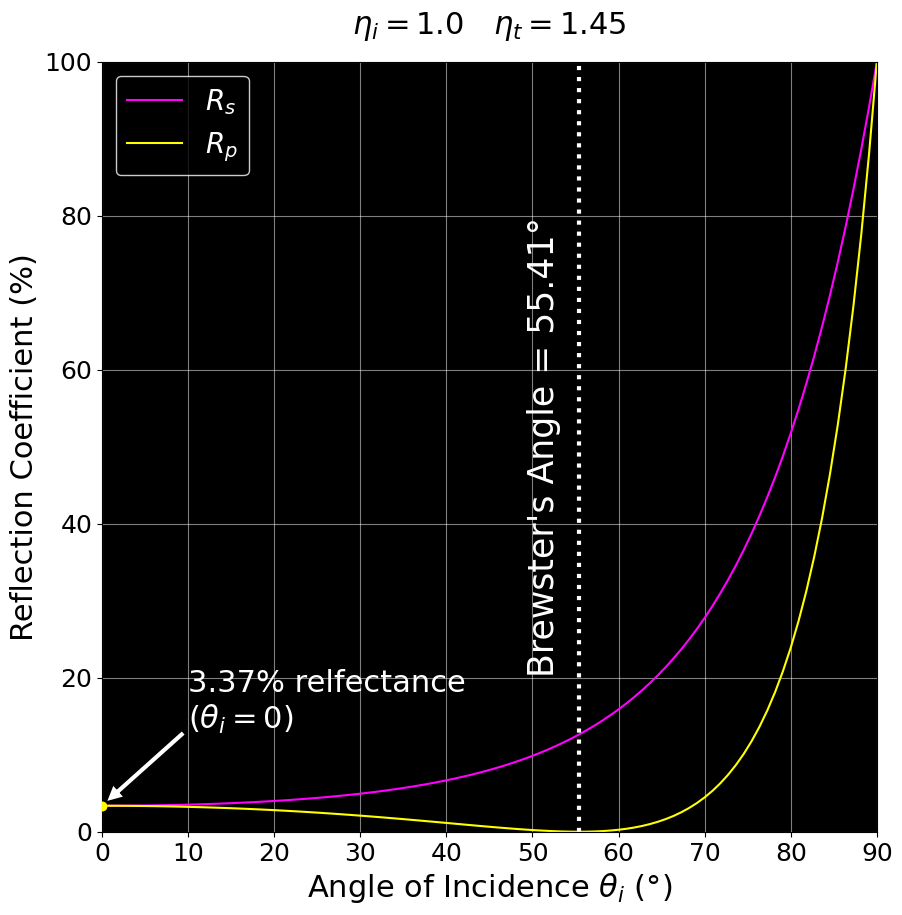

In [83]:

n_i = 1.00
n_t = 1.45

plot_brewster_angle(n_i, n_t, fresnel_reflectance)


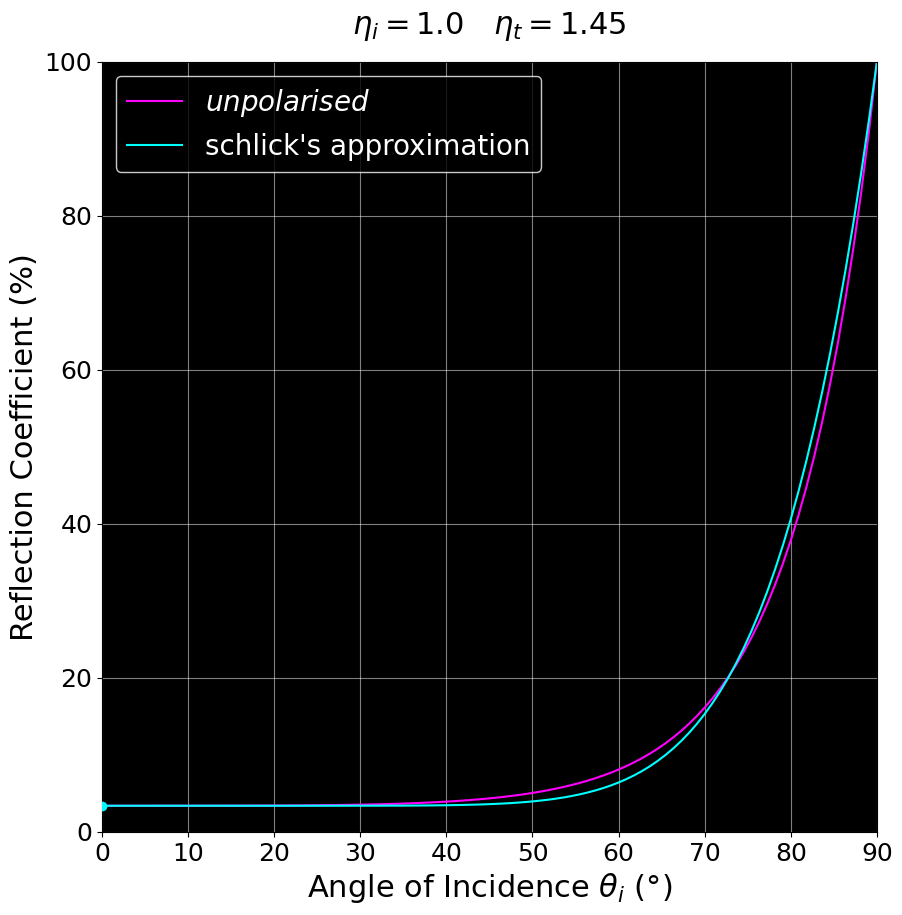

In [70]:
n_i = 1.00
n_t = 1.45

plot_schlick_approximation(n_i, n_t)

